<a href="https://colab.research.google.com/github/jess22jess/EDPII/blob/main/M%C3%A9t_Variacional.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [32]:
import sympy as sp
import numpy as np
import matplotlib.pyplot as plt

In [33]:
# Definimos variable y función
x, A1, A2 = sp.symbols('x A1 A2')
u = sp.Function('u')
b1 = sp.Function('b1')
b2 = sp.Function('b2')

In [34]:
ode = u(x).diff(x, x) + u(x) - x**2  # definimos la ecuación
sp.dsolve(ode, u(x))

Eq(u(x), C1*sin(x) + C2*cos(x) + x**2 - 2)

In [35]:
sol = sp.dsolve(ode, ics={u(0): 0, u(1): 0})  # diccionario
# resolvemos la EDO con condiciones de contorno

In [36]:
sol

Eq(u(x), x**2 + (1 - 2*cos(1))*sin(x)/sin(1) + 2*cos(x) - 2)

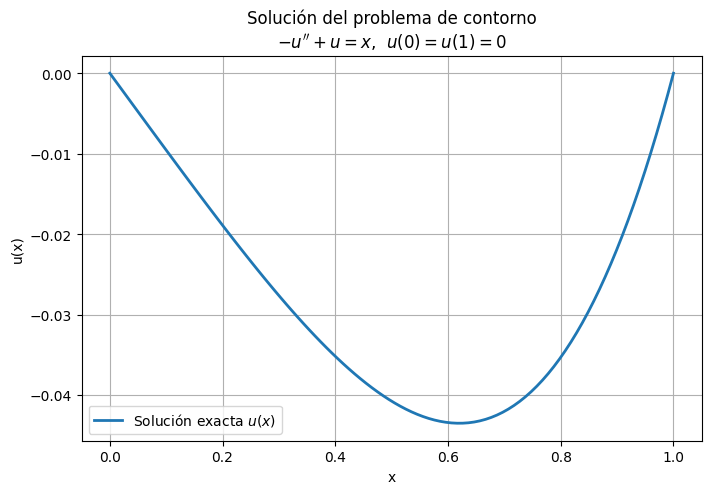

In [37]:
# Convertir la solución analítica a función numérica
u_expr = sol.rhs
u_num = sp.lambdify(x, u_expr, "numpy")

# Graficar solución analítica
xx = np.linspace(0, 1, 100)
yy = u_num(xx)

plt.figure(figsize=(8,5))
plt.plot(xx, yy, label="Solución exacta $u(x)$", linewidth=2)
plt.title("Solución del problema de contorno\n$-u'' + u = x$,  $u(0)=u(1)=0$")
plt.xlabel("x")
plt.ylabel("u(x)")
plt.grid(True)
plt.legend()
plt.show()

Método Numérico

In [38]:
b1 = x*(1-x)
b2 = x**2*(1-x)

In [39]:
db1 = b1.diff(x)
db1

1 - 2*x

In [40]:
db2 = b2.diff(x)
db2

-x**2 + 2*x*(1 - x)

In [41]:
-db1**2+b1**2

x**2*(1 - x)**2 - (1 - 2*x)**2

In [47]:
K11 = sp.integrate(-db1*db1+b1*b1, (x, 0, 1))
K12 = sp.integrate(-db1*db2+b1*b2, (x, 0, 1))
K21 = sp.integrate(-db2*db1+b2*b1, (x, 0, 1))
K22 = sp.integrate(-db2*db2+b2*b2, (x, 0, 1))

In [48]:
K11

-3/10

In [49]:
K12

-3/20

In [50]:
K21

-3/20

In [51]:
K22

-13/105

In [52]:
K=sp.Matrix([[K11,K12],[K21,K22]])
K

Matrix([
[-3/10,   -3/20],
[-3/20, -13/105]])

In [59]:
F1 = sp.integrate(x**2*b1, (x, 0, 1))
F2 = sp.integrate(x**2*b2, (x, 0, 1))
print(F1, F2)

1/20 1/30


In [60]:
F=sp.Matrix([F1,F2])
F

Matrix([
[1/20],
[1/30]])

In [64]:
s = K.solve(F)
s

Matrix([
[-10/123],
[  -7/41]])

In [65]:
A1=s[0]
A2=s[1]

In [66]:
A1

-10/123

In [67]:
A2

-7/41